## Problem Statement: Various users have provided ratings to the different movies, based on the ratings available we are required to recommend the movies to the users.

## Solution approach: We will be using User-Based Collaborative filtering and Item-Based Collaborative Filtering to receommend the movie to the user.

## Secondly we will also use the movies metadata and the genres tags to recommend movies based on Content Based filtering

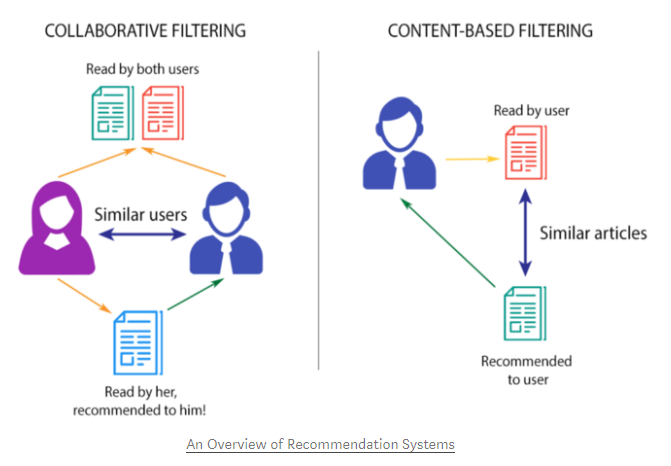

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data',sep = '\t',names = columns)

In [3]:
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
df_merged = df.merge(movie_titles,on = 'item_id')

In [6]:
df_merged

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [7]:
ratings = df_merged.groupby(['title']).agg({'rating': 'mean','user_id': 'count'})

In [8]:
ratings

,rating,user_id
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [9]:
ratings.columns = ['avg_rating','num_of_rating']

In [10]:
ratings

,avg_rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


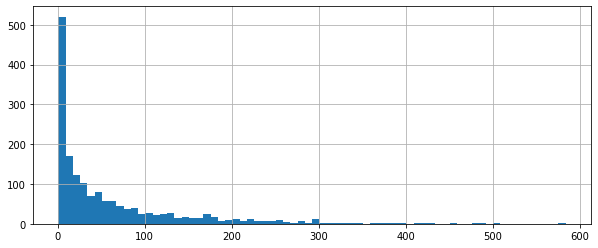

In [11]:
plt.figure(figsize = (10,4))
ratings['num_of_rating'].hist(bins = 70)

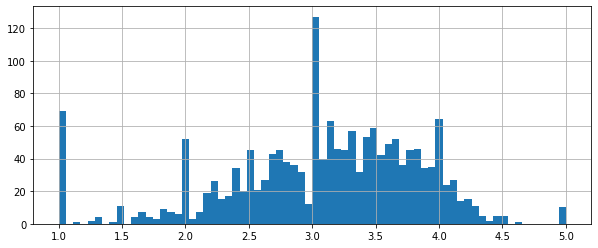

In [12]:
plt.figure(figsize = (10,4))
ratings['avg_rating'].hist(bins = 70)

## User-Based vs Item-Based Collaborative Filtering
### User-based:  where the rating matrix is used to find similar users based on the ratings they give, is called user-based or user-user collaborative filtering
### Item-based: If you use the rating matrix to find similar items based on the ratings given to them by users, then the approach is called item-based or item-item collaborative filtering.

In [13]:
moviemat = df_merged.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings.sort_values(by = 'num_of_rating',ascending=False)

,avg_rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


## Performing Item based collaborative filtering 

In [15]:
#star wars and liar liar
star_wars_rating = moviemat['Star Wars (1977)']
liar_liar_rating = moviemat['Liar Liar (1997)']

In [16]:
star_wars_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [17]:
similar_starwars = moviemat.corrwith(star_wars_rating)
similar_liarliar = moviemat.corrwith(liar_liar_rating)

C:\Users\somal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\somal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [18]:
similar_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [19]:
corr_starwars = pd.DataFrame(data = similar_starwars,columns = ['correlation_with_starwars'])

In [20]:
corr_starwars.dropna(inplace = True)
corr_starwars

,correlation_with_starwars
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [21]:
corr_starwars.sort_values(by = 'correlation_with_starwars',ascending=False)

,correlation_with_starwars
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


### there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [22]:
corr_starwars = corr_starwars.join(ratings['num_of_rating'])
corr_starwars

,correlation_with_starwars,num_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [23]:
corr_starwars[corr_starwars['num_of_rating']>100].sort_values(by = 'correlation_with_starwars',ascending = False).head(10)

,correlation_with_starwars,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


## above are 10 recommended movie for user who has watched star wars, based on item based collaborative filtering

In [24]:
corr_liarliar = pd.DataFrame(data = similar_liarliar,columns = ['correlation_with_liarliar'])
corr_liarliar.dropna(inplace = True)
corr_liarliar

,correlation_with_liarliar
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016


In [25]:
corr_liarliar = corr_liarliar.join(ratings['num_of_rating'])

In [26]:
corr_liarliar[corr_liarliar['num_of_rating']>100].sort_values(by = 'correlation_with_liarliar',ascending = False).head(10)

,correlation_with_liarliar,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


## above are 10 recommended movie for user who has watched liarliar, based on item based collaborative filtering

# Lets try it with Matrix Factorisation and Cosine Similariy

### Dimensionality Reduction
In the user-item matrix, there are two dimensions:

1) The number of users
2) The number of items

If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time.

Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones. This is similar to the factorization of integers, where 12 can be written as 6 x 2 or 4 x 3. In the case of matrices, a matrix A with dimensions m x n can be reduced to a product of two matrices X and Y with dimensions m x p and p x n respectively.

The reduced matrices actually represent the users and items individually. The m rows in the first matrix represent the m users, and the p columns tell you about the features or characteristics of the users. The same goes for the item matrix with n items and p characteristics. 

The matrix is reduced into two matrices. The one on the left is the user matrix with m users, and the one on top is the item matrix with n items. The rating 4 is reduced or factorized into:

A user vector (2, -1)
An item vector (2.5, 1)
The two columns in the user matrix and the two rows in the item matrix are called latent factors and are an indication of hidden characteristics about the users or the items. A possible interpretation of the factorization could look like this:

Assume that in a user vector (u, v), u represents how much a user likes the Horror genre, and v represents how much they like the Romance genre.

The user vector (2, -1) thus represents a user who likes horror movies and rates them positively and dislikes movies that have romance and rates them negatively.

Assume that in an item vector (i, j), i represents how much a movie belongs to the Horror genre, and j represents how much that movie belongs to the Romance genre.

The movie (2.5, 1) has a Horror rating of 2.5 and a Romance rating of 1. Multiplying it by the user vector using matrix multiplication rules gives you (2 * 2.5) + (-1 * 1) = 4.

So, the movie belonged to the Horror genre, and the user could have rated it 5, but the slight inclusion of Romance caused the final rating to drop to 4.

The number of latent factors affects the recommendations in a manner where the greater the number of factors, the more personalized the recommendations become. But too many factors can lead to overfitting in the model.

In [27]:
moviemat_mf = df_merged.pivot_table(index = 'title', columns = 'user_id', values = 'rating').fillna(0)
moviemat_mf

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus and Roxanne (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
moviemat_mf.index

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)
latent_mat_movie = pca.fit_transform(moviemat_mf)

In [30]:
latent_mat_movie_df = pd.DataFrame(latent_mat_movie,index = moviemat_mf.index)

In [31]:
latent_mat_movie_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),-8.049629,0.234668,-0.361794,-0.736410,-0.393108,0.071515,-0.252730,1.464916,0.367217,-0.587133,...,0.362113,-0.046868,-0.253993,0.295015,0.017887,0.011410,-0.009933,-0.113462,0.143716,-0.184758
1-900 (1994),-8.625638,-0.691697,-0.068574,0.782058,-0.100593,1.316130,0.179165,1.091904,0.697455,-0.084919,...,-0.061249,-0.087417,-0.223685,0.159498,0.130435,0.100612,0.189284,0.313251,0.667129,0.073730
101 Dalmatians (1996),3.237319,5.505559,-5.069366,-6.158600,-7.313542,2.093634,1.484018,-3.295632,1.540127,4.008617,...,-0.016477,1.023729,0.529749,0.247401,-0.708077,-1.012796,-0.296641,0.674548,-2.394266,-0.311698
12 Angry Men (1957),16.651082,-12.316535,5.908566,-3.221716,-0.050997,2.621106,-3.195192,-0.159632,1.599639,-5.974182,...,0.648384,-1.338940,-0.841009,-0.324406,-0.145468,-0.454110,-1.575025,-0.138133,-1.113820,0.118386
187 (1997),-5.941001,3.698419,2.196269,-0.960227,2.868576,-0.607135,-0.332746,0.183056,2.657970,-0.124541,...,0.797577,-0.405681,-1.192392,-0.078442,-0.575188,0.372654,-0.355569,-0.593541,-1.783674,-0.525557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),-2.626317,1.231024,-5.932834,2.169061,2.226202,-1.741494,-0.604552,0.245545,-0.817851,-1.259412,...,0.198702,0.516052,0.673817,-0.080409,0.722878,0.209539,0.852691,-0.479551,0.353221,-1.368757
"Young Poisoner's Handbook, The (1995)",-4.721718,1.645127,3.161677,5.023296,-0.173334,-0.064122,1.129986,-1.745857,1.350453,1.996388,...,-1.098329,0.849646,0.811853,1.184564,0.132755,0.064915,-0.461852,-0.000630,-0.738560,0.048968
Zeus and Roxanne (1997),-8.691615,-0.053855,-0.381675,-0.278952,-0.869866,1.313656,0.375199,1.267786,0.398597,0.081360,...,0.314943,0.151444,-0.103581,-0.103603,0.080825,0.064769,0.067621,-0.089884,-0.326347,-0.174060


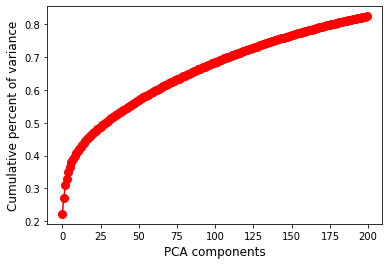

In [32]:
# plot variance expalined to see what latent dimensions to use
explained = pca.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('PCA components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

### This means that our 200 components explains about 80% of the variance

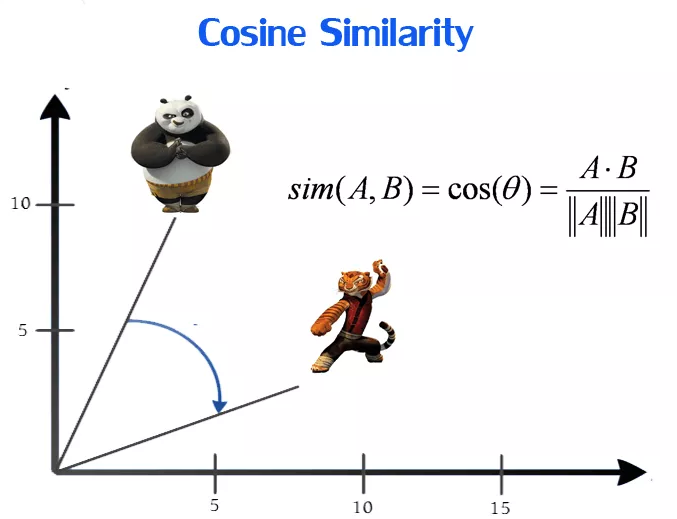

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
star_wars_vector = latent_mat_movie_df.loc['Star Wars (1977)']

In [35]:
star_wars_vector = np.array(star_wars_vector).reshape(1,-1)

In [36]:
similar_star = cosine_similarity(latent_mat_movie_df, star_wars_vector)

In [37]:
similar_star

array([[-0.65662313],
       [-0.67506947],
       [ 0.15031634],
       ...,
       [-0.7016509 ],
       [-0.55591703],
       [-0.72319646]])

In [38]:
final_df = pd.DataFrame(similar_star,index = latent_mat_movie_df.index )

In [39]:
final_df.columns = ['cosine_similarity_with_star_wars']

In [40]:
final_df.sort_values(by = 'cosine_similarity_with_star_wars',ascending=False)

,cosine_similarity_with_star_wars
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.905649
Raiders of the Lost Ark (1981),0.762475
"Empire Strikes Back, The (1980)",0.742167
Toy Story (1995),0.717098
...,...
Hush (1998),-0.737445
"Bloody Child, The (1996)",-0.737996
Power 98 (1995),-0.737996


In [41]:
final_df = final_df.join(ratings['num_of_rating'])

In [42]:
final_df[final_df['num_of_rating'] > 100].sort_values(by = 'cosine_similarity_with_star_wars',ascending=False ).head(10)

,cosine_similarity_with_star_wars,num_of_rating
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.905649,507
Raiders of the Lost Ark (1981),0.762475,420
"Empire Strikes Back, The (1980)",0.742167,368
Toy Story (1995),0.717098,452
"Godfather, The (1972)",0.671091,413
Independence Day (ID4) (1996),0.663843,429
Indiana Jones and the Last Crusade (1989),0.662561,331
Fargo (1996),0.654957,508


## Using correlation

In [43]:
corr_starwars[corr_starwars['num_of_rating']>100].sort_values(by = 'correlation_with_starwars',ascending = False).head(10)

,correlation_with_starwars,num_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# Content Bases Filtering

In [44]:
df_movies = pd.read_csv('movie.csv')

In [45]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [46]:
df_movies['genres'] = df_movies['genres'].str.replace('|',' ')

In [47]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [48]:
tags = pd.read_csv('tag.csv')

In [49]:
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [50]:
mixed = df_movies.merge(tags,on = 'movieId',how = 'left')
mixed

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature,2007-07-08 22:21:47
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation,2007-07-08 22:46:10
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33
...,...,...,...,...,...,...
473292,131258,The Pirates (2014),Adventure,28906.0,mutiny,2015-03-30 19:59:02
473293,131258,The Pirates (2014),Adventure,28906.0,pirates,2015-03-30 19:56:59
473294,131258,The Pirates (2014),Adventure,28906.0,whale,2015-03-30 19:57:12
473295,131260,Rentun Ruusu (2001),(no genres listed),NaN,NaN,NaN


In [51]:
mixed.fillna(" ",inplace = True)
mixed

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741,Disney animated feature,2007-07-08 22:21:47
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741,Pixar animation,2007-07-08 22:46:10
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33
...,...,...,...,...,...,...
473292,131258,The Pirates (2014),Adventure,28906,mutiny,2015-03-30 19:59:02
473293,131258,The Pirates (2014),Adventure,28906,pirates,2015-03-30 19:56:59
473294,131258,The Pirates (2014),Adventure,28906,whale,2015-03-30 19:57:12
473295,131260,Rentun Ruusu (2001),(no genres listed),,,


In [52]:
tags_group = mixed.groupby('movieId')['tag'].apply(lambda x: ' '.join(x))
tags_group

movieId
1         Watched computer animation Disney animated fea...
2         time travel adapted from:book board game child...
3         old people that is actually funny sequel fever...
4         chick flick revenge characters chick flick cha...
5         Diane Keaton family sequel Steve Martin weddin...
                                ...                        
131254                                                     
131256                                                     
131258                   bandits Korea mutiny pirates whale
131260                                                     
131262                                                     
Name: tag, Length: 27278, dtype: object

In [53]:
tags_group_df = pd.DataFrame(tags_group)
tags_group_df.columns = ['metadata']
tags_group_df

,metadata
movieId,
1,Watched computer animation Disney animated fea...
2,time travel adapted from:book board game child...
3,old people that is actually funny sequel fever...
4,chick flick revenge characters chick flick cha...
5,Diane Keaton family sequel Steve Martin weddin...
...,...
131254,
131256,
131258,bandits Korea mutiny pirates whale


In [54]:
df_final = df_movies.merge(tags_group_df,on = 'movieId',how = 'left')
df_final

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Watched computer animation Disney animated fea...
1,2,Jumanji (1995),Adventure Children Fantasy,time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),Comedy Romance,old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Comedy,Diane Keaton family sequel Steve Martin weddin...
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,
27275,131258,The Pirates (2014),Adventure,bandits Korea mutiny pirates whale
27276,131260,Rentun Ruusu (2001),(no genres listed),


In [55]:
df_final['metadata'] = df_final[['genres','metadata']].apply(lambda x: ' '.join(x),axis = 1)
df_final

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Wa...
1,2,Jumanji (1995),Adventure Children Fantasy,Adventure Children Fantasy time travel adapted...
2,3,Grumpier Old Men (1995),Comedy Romance,Comedy Romance old people that is actually fun...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Comedy Drama Romance chick flick revenge chara...
4,5,Father of the Bride Part II (1995),Comedy,Comedy Diane Keaton family sequel Steve Martin...
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Comedy
27275,131258,The Pirates (2014),Adventure,Adventure bandits Korea mutiny pirates whale
27276,131260,Rentun Ruusu (2001),(no genres listed),(no genres listed)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [57]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [58]:
tfidf_matrix = tfidf.fit_transform(df_final['metadata'])
tfidf_matrix

<27278x23865 sparse matrix of type '<class 'numpy.float64'>'
	with 336147 stored elements in Compressed Sparse Row format>

In [59]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df_final.index.tolist())
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,23855,23856,23857,23858,23859,23860,23861,23862,23863,23864
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#pca_content = PCA(n_components = 200)
#latent_mat_cont = pca_content.fit_transform(tfidf_df)

In [61]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)

In [62]:
latent_mat_cont = svd.fit_transform(tfidf_df)

In [63]:
latent_mat_cont

array([[ 2.70410289e-02,  5.20899024e-02,  1.93701454e-02, ...,
        -1.92027139e-02,  5.94097283e-02,  6.73276058e-02],
       [ 1.06476394e-02,  1.04358644e-02,  2.59052020e-02, ...,
         2.56798581e-02,  3.27288648e-03,  3.19029394e-02],
       [ 3.91290542e-02,  7.37368052e-02, -4.99362347e-03, ...,
         9.86227499e-03, -2.49971580e-03,  1.86718460e-02],
       ...,
       [ 6.25664296e-03,  3.88702572e-03,  1.43235739e-02, ...,
         1.03658087e-03,  5.24160374e-03,  1.91265410e-04],
       [ 3.42036396e-05,  1.82305323e-05,  1.68041324e-04, ...,
        -1.45306965e-04, -2.18100788e-05,  6.52459778e-04],
       [ 5.74849128e-02,  4.41825343e-02,  3.35722031e-01, ...,
         1.22399406e-03, -3.37087699e-03,  1.19773523e-03]])

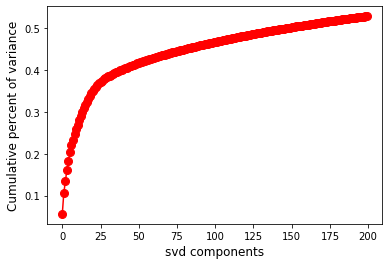

In [64]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('svd components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [67]:
list(df_final['title'])

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Wings of Courage (1995)',
 'Babe (1995)',
 'Carrington (1995)',
 'Dead Man Walking (1995)',
 'Across the Sea of 

In [68]:
latent_cont_df = pd.DataFrame(data = latent_mat_cont,index = list(df_final['title']) )
latent_cont_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.027041,0.052090,0.019370,0.003387,0.004178,-0.025799,0.113321,0.013069,-0.007033,0.105491,...,-0.031018,0.019138,-0.055242,-0.067419,0.053179,0.181750,-0.037295,-0.019203,0.059410,0.067328
Jumanji (1995),0.010648,0.010436,0.025905,0.000945,0.013515,-0.001865,0.068415,0.012867,0.003369,0.052277,...,0.026260,0.020967,-0.015078,-0.025896,0.021144,-0.007202,-0.009679,0.025680,0.003273,0.031903
Grumpier Old Men (1995),0.039129,0.073737,-0.004994,-0.001391,0.031400,0.002604,-0.003672,-0.001799,-0.000331,0.000454,...,-0.010832,-0.010626,0.007907,0.002095,-0.003238,-0.015386,-0.013666,0.009862,-0.002500,0.018672
Waiting to Exhale (1995),0.136270,0.076628,-0.020842,-0.002368,0.099930,0.012561,-0.012209,-0.002446,-0.004689,-0.003277,...,0.063957,0.092203,-0.001263,-0.067083,0.005147,-0.004863,-0.052184,0.051478,-0.090713,0.020309
Father of the Bride Part II (1995),0.038872,0.083704,0.000436,-0.000016,-0.013781,-0.000219,0.013668,-0.000288,0.007571,0.014437,...,-0.009454,-0.016325,0.006700,0.025098,0.022036,0.066820,-0.029438,0.004959,-0.004687,-0.043569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kein Bund für's Leben (2007),0.386785,0.887068,-0.089254,-0.019848,-0.220450,0.001401,-0.033448,-0.043889,-0.014952,-0.010727,...,-0.000079,-0.000006,-0.000209,-0.000683,-0.000758,0.000178,-0.000309,-0.000453,0.000051,-0.000162
"Feuer, Eis & Dosenbier (2002)",0.386785,0.887068,-0.089254,-0.019848,-0.220450,0.001401,-0.033448,-0.043889,-0.014952,-0.010727,...,-0.000079,-0.000006,-0.000209,-0.000683,-0.000758,0.000178,-0.000309,-0.000453,0.000051,-0.000162
The Pirates (2014),0.006257,0.003887,0.014324,0.001692,0.013349,-0.022168,0.058347,0.000306,-0.003217,0.017319,...,-0.005930,-0.010642,0.002275,0.002099,-0.011367,-0.005135,0.003433,0.001037,0.005242,0.000191
Rentun Ruusu (2001),0.000034,0.000018,0.000168,0.000420,0.000216,0.000018,0.000420,-0.000379,0.004823,0.000375,...,-0.000228,0.000569,-0.000363,-0.000100,0.000216,0.000766,0.000218,-0.000145,-0.000022,0.000652


In [72]:
toystory_vector = np.array(latent_cont_df.loc['Toy Story (1995)']).reshape(1, -1)

In [73]:
similar_toystory = cosine_similarity(latent_cont_df,toystory_vector)

In [75]:
similar_toystory_df = pd.DataFrame()
similar_toystory_df['title'] = latent_cont_df.index
similar_toystory_df['cosine_similarity'] = similar_toystory


In [77]:
similar_toystory_df.sort_values(by = 'cosine_similarity',ascending=False).head(10)

,title,cosine_similarity
0,Toy Story (1995),1.000000
3027,Toy Story 2 (1999),0.960620
2270,"Bug's Life, A (1998)",0.905455
11614,Ratatouille (2007),0.898649
4790,"Monsters, Inc. (2001)",0.880955
5121,Ice Age (2002),0.872824
6271,Finding Nemo (2003),0.869605
15401,Toy Story 3 (2010),0.863429
8278,"Incredibles, The (2004)",0.782082
21168,Monsters University (2013),0.781278


## above is top 10 similar movies based on content based filtering

In [84]:
def similar(matrix,movie_name):
    vector = np.array(matrix.loc[movie_name]).reshape(1, -1)
    similar_movies = cosine_similarity(matrix,vector)
    similar_movies_df = pd.DataFrame()
    similar_movies_df['title'] = matrix.index
    similar_movies_df['cosine_similarity'] = similar_movies
    similar_10 = similar_movies_df.sort_values(by = 'cosine_similarity',ascending=False).head(10)
    return similar_10
        

In [86]:
a = similar(latent_cont_df,'Tom and Huck (1995)')
a

,title,cosine_similarity
7,Tom and Huck (1995),1.000000
6637,"Adventures of Huckleberry Finn, The (1960)",0.860543
4980,"Adventures of Huck Finn, The (1993)",0.807139
12752,Huckleberry Finn (1974),0.779046
13089,"Adventures of Huckleberry Finn, The (1939)",0.777129
3085,Ulysses (Ulisse) (1954),0.750825
16390,"Sarah, Plain and Tall (1991)",0.743845
18738,Don Quixote (1933),0.742255
14658,"Sun Also Rises, The (1957)",0.726592
19263,"Cat in the Hat, The (1971)",0.721611
